# <b>Image Signal Compression
---
##### Kamil Ujas, Mikołaj Leszczuk

---

We will test lossless and lossy compression. We will also use the PSNR function to calculate Peak Signal-to-Noise Ratio (PSNR) image quality metric for compressed images.



<ul>
    <li><b>Exercise 1 - Tagged Image File Format, Portable Network Graphics, Windows Bitmap </b></li>
    <li><b>Exercise 2 - JPEG compression</b></li>
    <li><b>Exercise 3 - DCT</b></li>
    <li><b>Exercise 4 - PSNR</b></li>
    <li><b>Exercise 5 - DWT</b></li>
    <li><b>Exercise 6 - Take a photo and try JPEG compress</b></li>
    <li><b>Supplemental Exercise (Optional)</b></li>
    
</ul>


---



# **Instruction**:


---


**When you see:**

 start.jpg

Please click that to load all settings. Wait for: "All settings loaded correctly. Now you can go to Exercise 1"


---



**Warning: This notebook was not authored by Google.**

Please click: Run anyway.


---


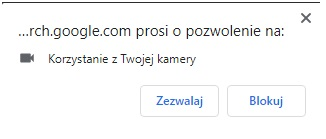

Please click: "Zezwalaj" or "Allow."


---



In [1]:
#@title <== Please click the Run button. { display-mode: "form" }
import cv2 as cv
import matplotlib.pyplot as plt
#plt.rcParams['figure.dpi'] = 100
from ipywidgets import interact, fixed
from PIL import Image
import os
from math import log10, sqrt 
import numpy as np
import ipywidgets as widgets
from IPython.display import display
from IPython.display import HTML
%matplotlib inline
import importlib
import imageio
import math
import warnings
warnings.filterwarnings('ignore')
import pywt
import pywt.data
from matplotlib.image import imread
import urllib
import urllib.request, urllib.error
!pip install rawpy
import rawpy

# skopiuj zawartość z GitHub, może kiedyś się przyda jeszcze
#!git clone https://github.com/k-ujas/imagecompression

# Lista plików
file_list = [('1.CR2','https://drive.google.com/uc?export=view&id=1DCR602WNrsSjHpWSc4DKt7DTqMy3XAoo'),
             ('2.CR2','https://drive.google.com/uc?export=view&id=1-rnNlPCzVqR5b6wlBI7cH3X6_eaaI0pF'),
             ('3.CR2','https://drive.google.com/uc?export=view&id=1En-4Be9hFLmw3o7RA4eyne6IyUGsN3Tn'),
             ('4.CR2','https://drive.google.com/uc?export=view&id=1BquAFCxCuXn1z7zqWSf7oyoDmumNqT9d'),
             ('5.CR2','https://drive.google.com/uc?export=view&id=1fFIkO3J4DDKuedMsJxh08xi0kOFhudKg'),
             ('6.CR2','https://drive.google.com/uc?export=view&id=1hjJOpMOaALEhXHDnB_1ZZUMQ2OkadsaF'),
             ('7.CR2','https://drive.google.com/uc?export=view&id=1RgpNIQLA7c40INfaM1v6BL9nQkRNwVrB'),
             ('8.CR2','https://drive.google.com/uc?export=view&id=1ARvJiVNz1YC4qCK0kMJHI2ZyZZEtSYoT'),
             ('agh.png','https://drive.google.com/uc?export=view&id=1ybj8CHeIUPWYFCe9vvnneksoL6bCTLUS'),
             ('agh1.png','https://drive.google.com/uc?export=view&id=1l2_cNaVgkiZtctlKHiHHcqdJuGZ348MH'),
             ('aghjpeg_1.jpg','https://drive.google.com/uc?export=view&id=1yupeTktceNogt805sSiDAqXvAH1Xcc_j'),
             ('bmpp.bmp','https://drive.google.com/uc?export=view&id=1McQ_yZ4cPu5dtnX9uNSVQf5VQ31Zck06'),
             ('cameraman.jpg','https://drive.google.com/uc?export=view&id=1euLUoSpTs3jYME9VQr3KJkL4_kHmILGg'),
             ('cameraman.tif','https://drive.google.com/uc?export=view&id=1Lfql-3NeGOl5hVsiJdXDmD39Y56x4V1u'),
             ('ownfile.jpg','https://drive.google.com/uc?export=view&id=1kPMNTAuS_9Ms3McXAmTtEBGmo1Ra3e46'),
             ('ownfile.tif','https://drive.google.com/uc?export=view&id=1VJZUpXd5WxOlceAcAPvqcVZT09Y8oJKL'),
             ('ownfile2.jpg','https://drive.google.com/uc?export=view&id=1ZkdJ6FnqIh5QtXg6SMpZGvblk2UJLzV-'),
             ('pngg.png','https://drive.google.com/uc?export=view&id=1swT8xSvh2ZYtA5B3VZHbyxSfr538bl7i'),
             ('poli.bmp','https://drive.google.com/uc?export=view&id=1UG09MXJSzcN9nLli9f-Vnp87NZjhyaBU'),
             ('psnr_50.jpg','https://drive.google.com/uc?export=view&id=18eQsoh6revQ2iKblP1Xq1QAyrS9MZVkb'),
             ('skompresowany.jpg','https://drive.google.com/uc?export=view&id=1lWz2-XIvR2gcZXf0B79nCe1dVipURP15'),
             ('skompresowanymaks.jpg','https://drive.google.com/uc?export=view&id=1eO0V_vOu2a6zWVCusgAbdJeGyJO-LEr3'),
             ('skompresowanymin.jpg','https://drive.google.com/uc?export=view&id=1iZ0kNNhVbs9xopievc2gC5TA4uKcmNhn'),
             ('skompresowanypol.jpg','https://drive.google.com/uc?export=view&id=11DvskV_SaEvmHBjNHUMiNqwUV9QuzVpQ')]

# Załadowanie plików
!mkdir -p imagecompression
for line in file_list:
  filename = line[0]
  url = line[1]
  !wget -q -O imagecompression/$filename "$url"

print("All settings loaded correctly. Now you can go to Exercise 1")

Image.open('imagecompression/pngg.png').save('imagecompression/bmpp.bmp')
img_bgr = cv.imread('imagecompression/cameraman.tif')
pngg = cv.imread('imagecompression/pngg.png')
skompresowanymaks = cv.imread('imagecompression/skompresowanymaks.jpg')
bmpp = cv.imread('imagecompression/bmpp.bmp')
# minimum compress
skompresowanymin = cv.imread('imagecompression/skompresowanymin.jpg')
cv.imwrite('imagecompression/skompresowanymin.jpg' , img_bgr , [cv.IMWRITE_JPEG_QUALITY,90])
# half compress
skompresowanypol = cv.imread('imagecompression/skompresowanypol.jpg')
cv.imwrite('imagecompression/skompresowanypol.jpg' , img_bgr , [cv.IMWRITE_JPEG_QUALITY,50])
# maximum compress
skompresowanymaks = cv.imread('imagecompression/skompresowanymaks.jpg')
cv.imwrite('imagecompression/skompresowanymaks.jpg' , img_bgr , [cv.IMWRITE_JPEG_QUALITY,1])
# download = cv.imread('imagecompression/download.bmp')
def ploting2(toPlot1, title1, toPlot2, title2, cmap):
    plt.figure(figsize=[19.0, 8.0])
    plt.subplot(1,2,1)
    plt.title(title1)
    plt.imshow(toPlot1, cmap)
    plt.axis('off')
    plt.subplot(1,2,2)
    plt.title(title2)
    plt.imshow(toPlot2, cmap)
    plt.axis('off')
    plt.show()
#function psnr
def PSNR(x, y): 
    mse = np.mean((x - y) ** 2) 
    if(mse == 0):  # MSE is zero means no noise is present in the signal . 
                  # Therefore PSNR have no importance. 
        return 100
    max_pixel = 255.0
    psnr = 20 * log10(max_pixel / sqrt(mse)) 
    return psnr
def question1(select, x):
    if select == 'Choose correct answer from the list':
        print('Choose correct answer from the list')
    else:
        if select == x:
            print('Congratulations, correct answer!')
            print('Size of image .tif :',round(os.path.getsize('imagecompression/cameraman.tif')/1024,2),'kB.')
        if select < x:
            print('Bad answer')
        if select > x:
            print('Bad answer') 
def question2(select, x):
    if select == 'Choose correct answer from the list':
        print('Choose correct answer from the list')
    else:
        
        if select == x:
            print('Congratulations, correct answer!\n')
            print('Size of image .png :',round(os.path.getsize('imagecompression/pngg.png')/1024,2),'kB.')
        if select < x:
            print('Bad answer')
        if select > x:
            print('Bad answer')
def question3(select, x):
    if select == 'Choose correct answer from the list':
        print('Choose correct answer from the list')
    else:
        if select == x:
            print('Congratulations, correct answer!\n')
            print('Size of image .bmp :',round(os.path.getsize('imagecompression/bmpp.bmp')/1024,2),'kB.')
        if select < x:
            print('Bad answer')
        if select > x:
            print('Bad answer')
def question4(select, x):
    if select == 'Choose correct answer from the list':
        print('Choose correct answer from the list')
    else:
        if select == x:
            print('Congratulations, correct answer!\n')
            print('Size of image after minimum compression :',round(os.path.getsize('imagecompression/skompresowanymin.jpg')/1024,2),'kB.')
        if select < x:
            print('Bad answer')
        if select > x:
            print('Bad answer')
def question5(select, x):
    if select == 'Choose correct answer from the list':
        print('Choose correct answer from the list')
    else:
        if select == x:
            print('Congratulations, correct answer!\n')
            print('Size of image after half compression :',round(os.path.getsize('imagecompression/skompresowanypol.jpg')/1024,2),'kB.')
        if select < x:
            print('Bad answer')
        if select > x:
            print('Bad answer')  
def question6(select, x):
    if select == 'Choose correct answer from the list':
        print('Choose correct answer from the list')
    else:
        if select == x:
            print('Congratulations, correct answer!\n')
            print('Size of image after maximum compression : ',round(os.path.getsize('imagecompression/skompresowanymaks.jpg')/1024,2),'kB.')
        if select < x:
            print('Bad answer')
        if select > x:
            print('Bad answer')                 

     |████████████████████████████████| 1.7 MB 5.2 MB/s 
All settings loaded correctly. Now you can go to Exercise 1


# <b>Exercise 1

#### *Below we can see cameraman image in formats:*

Guess size file (in kB) - choose the correct answer from the list (Image 256x256px)



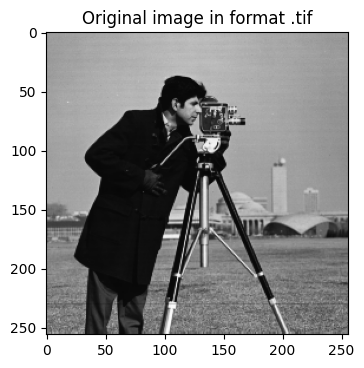

interactive(children=(Dropdown(description='select', options=('Choose correct answer from the list', 21.96, 31…

Choose correct answer from the list

PSNR value : 28.75 dB


In [2]:
#@title  .tif (Tagged Image File Format) { display-mode: "form" }    
plt.figure(dpi = 100)
plt.imshow(img_bgr)
plt.title("Original image in format .tif")
print('Guess size file (in kB) - choose the correct answer from the list (Image 256x256px)\n')
    
interact(question1, select=['Choose correct answer from the list', 21.96, 318.55 , 52.11 , 63.71 , 231.21 , 17.58 ], x=fixed(63.71 ));
d = PSNR(img_bgr, skompresowanymaks)
print("\nPSNR value :",round(d,2),"dB")

Guess size file (in kB) - choose the correct answer from the list (Image 256x256px)



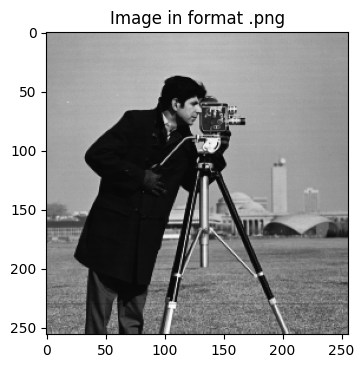

interactive(children=(Dropdown(description='select', options=('Choose correct answer from the list', 11.29, 56…


PSNR value : 33.99 dB


In [3]:
#@title  .png (Portable Network Graphics) { display-mode: "form" }
plt.figure(dpi = 100)
plt.imshow(pngg)
plt.title("Image in format .png")
print('Guess size file (in kB) - choose the correct answer from the list (Image 256x256px)\n')
    
interact(question2, select=['Choose correct answer from the list' , 11.29 , 56.12 , 23.11 , 74.35 ,113.25 , 25.74], x=fixed(56.12));
e = PSNR(pngg, skompresowanypol)
print("\nPSNR value :",round(e,2),"dB")

Guess size file (in kB) - choose the correct answer from the list (Image 256x256px)



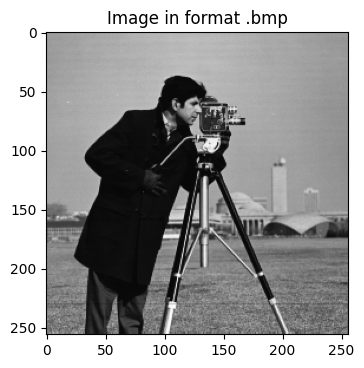

interactive(children=(Dropdown(description='select', options=('Choose correct answer from the list', 85.41, 59…


PSNR value : 39.92 dB


In [4]:
#@title  .bmp (Windows Bitmap) { display-mode: "form" }
plt.figure(dpi = 100)
plt.imshow(bmpp)
plt.title("Image in format .bmp")
print('Guess size file (in kB) - choose the correct answer from the list (Image 256x256px)\n')
    
interact(question3, select=['Choose correct answer from the list' , 85.41, 59.28 ,87.14, 251.52 , 99.21, 192.05], x=fixed(192.05));
f = PSNR(bmpp, skompresowanymin)
print("\nPSNR value :",round(f,2),"dB")

##### *We will see the impact of the lossless compression, used as the central part of the compression process.  Compare images (uncompressed and compressed) using psnr*
##### *What is the quality metric of the compressed image vs the uncompressed one? Was that possible to save a lot of file space using lossless compression?*

# <b>Exercise 2

#### *We will see Image.jpg after the minimum, half and maximum JPEG compression. What do you think about the quality of each of these files?*

Guess size file after JPEG compression - choose the correct answer from the list



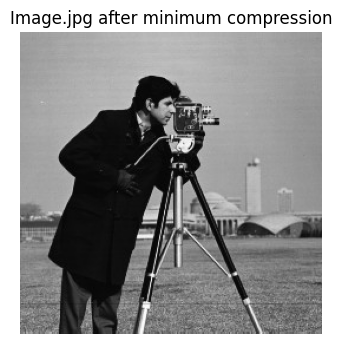

interactive(children=(Dropdown(description='select', options=('Choose correct answer from the list', 85.41, 18…

In [5]:
#@title  Show minimum compress: { display-mode: "form" }
plt.figure(dpi = 100)
plt.imshow(skompresowanymin)
plt.axis('off')
plt.title("Image.jpg after minimum compression")
print('Guess size file after JPEG compression - choose the correct answer from the list\n')
    
interact(question4, select=['Choose correct answer from the list' , 85.41, 18.09 ,87.14, 251.52 , 99.21, 192.05], x=fixed(18.09));

In [ ]:
#@title  Show half compress: { display-mode: "form" }
plt.figure(dpi = 100)
plt.imshow(skompresowanypol)
plt.axis('off')
plt.title("Image.jpg after half compression")
print('Guess size file after JPEG compression - choose the correct answer from the list\n')
    
interact(question5, select=['Choose correct answer from the list' , 12.84, 11.34 ,2.19, 13.51 , 7.54, 9.75], x=fixed(7.54));

Guess size file after JPEG compression - choose the correct answer from the list



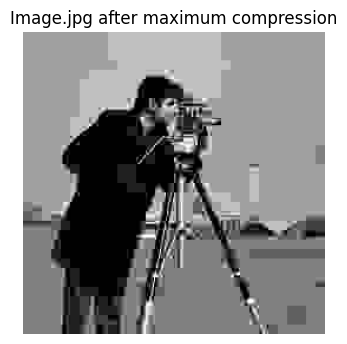

interactive(children=(Dropdown(description='select', options=('Choose correct answer from the list', 2.84, 1.3…

In [6]:
#@title  Show maximum compress: { display-mode: "form" }
plt.figure(dpi = 100)
plt.imshow(skompresowanymaks)
plt.axis('off')
plt.title("Image.jpg after maximum compression")
print('Guess size file after JPEG compression - choose the correct answer from the list\n')
    
interact(question6, select=['Choose correct answer from the list' , 2.84, 1.34 ,2.06, 3.51 , 5.54, 3.75], x=fixed(2.06));

##### **Here we import image AGH.tif (730x430px, original size 583 kB). We use JPEG compression to create AGH.jpg**

In [7]:
#@title  Select from the list image quality from 1 (lowest quality) to 100 (highest quality) and check AGH.jpg quality below { display-mode: "form" }
def f11(quality):    
    b = 'imagecompression/aghjpeg_'+str(quality)+'.jpg'
    ownfile = cv.imread('imagecompression/ownfile.tif')
    bc, gc, rc = cv.split(ownfile)
    ownfile_ok = cv.merge((rc,gc,bc))
    cv.imwrite(b , ownfile_ok , [cv.IMWRITE_JPEG_QUALITY,quality])
    bb = cv.imread(b)
    plt.figure(dpi = 120)
    plt.imshow(bb)
    plt.axis('off')
    plt.title(f"AGH.jpg quality {quality} %")
    if quality == quality:
        print('Size of image  : ',round(os.path.getsize(b)/1024,2),'kB.')
interact(f11, quality=[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40, 50, 60, 70, 80, 90, 100]);

interactive(children=(Dropdown(description='quality', options=(1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, …

##### What is the quality deterioration of the compressed image vs the uncompressed one?

## **Exercise 3**


---


##### *In this exercise, we can see image compression applying Discrete Cosine Transform (DCT). We will see how Discrete Cosine Transform (DCT) can be used for primary image signal compression. Compare both (uncompressed and compressed) images using **PSNR**. Observe some loss of quality in the image.*


---





**DCT Block Splitting**

Further compression only block-based

Each channel split into blocks

Block size depending on chroma subsampling:

*   8×8 (4:4:4)
*   16×8 (4:2:2)
*   16×16 (4:2:0)

Block in visual compression:

*   Image: Minimum Coded Unit (MCU)

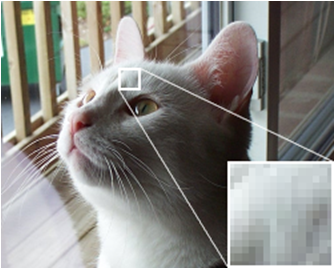




**DCT 8×8 Sub-Image Shown in 8-Bit Grey-Scale**



---



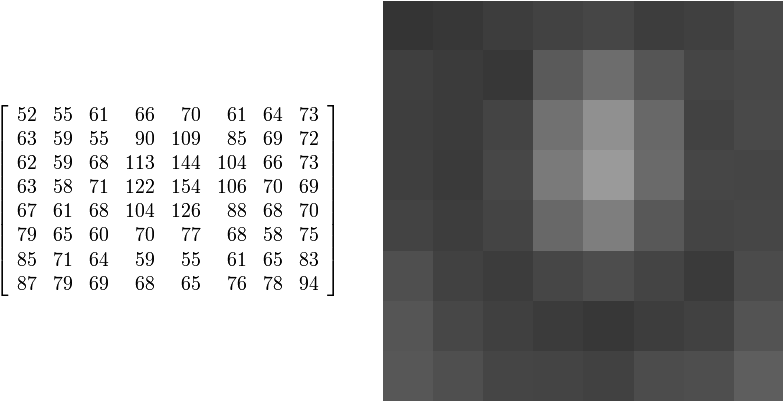

**Actual DCT**

Each (e.g. 8×8) block converted to frequency-domain representation


Using normalized, 2D DCT


Before computing DCT of 8×8 block, its values shifted:


*   From positive range
*   To one centred around zero

Coefficients:


*   Top-left corner entry with rather large magnitude – DC coefficient
*   Remaining 63 called AC coefficients


DCT coefficients of 8-bit/component image taking up to 11 bits:


*   DCT temporarily increasing data bit-depth
*   Reduced to 8-bit values by quantization

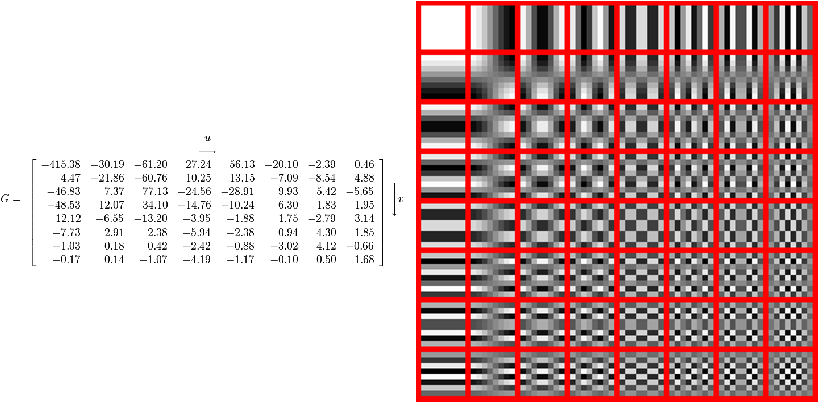





**DCT Quantization**

Seeing artefacts by human eye:


*   Good at large areas
*   Bad at high frequencies

Allowing to reduce high frequencies

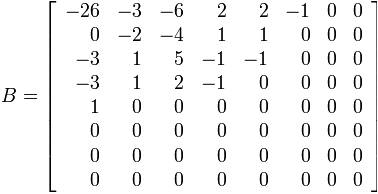

In [8]:
#@title  Choose value F (submatrix, inverted frequencies), D (remove frequencies) from the list and check the result below { display-mode: "form" }

from math import sqrt, cos, pi
from scipy.fftpack import dct as spfdct
from scipy.fftpack import idct as ispfdct


def fdct(values):
    values = values.copy()
    return spfdct(values, type=2, norm='ortho')


def ifdct(values):
    values = values.copy()
    return ispfdct(values, type=2, norm='ortho')


def dct(values):
  values = values.copy()
  c = []
  N = len(values)
  for k in range(N):
    if k == 0:
      alfa_k = sqrt(1/N)
    else:
      alfa_k = sqrt(2/N)
    partial_sum = 0
    for i in range(N):
      f_i = values[i]
      partial_sum += f_i * cos(pi * k * (2*i+1)/(2*N))
    c.append(alfa_k * partial_sum)
  return c


def dct2t(matrix):
  matrix = matrix.copy()
  for i, row in enumerate(matrix):
      matrix[i] = dct(row)

  # transpose matrix
  matrix = [*zip(*matrix)]

  for i, column in enumerate(matrix):
      matrix[i] = dct(list(column))

  # transpose matrix
  matrix = [*zip(*matrix)]
  return matrix


def fdct2t(matrix):
    matrix = matrix.copy()
    return spfdct(spfdct(matrix, type=2, norm="ortho").T, type=2, norm="ortho").T


def ifdct2t(matrix):
    matrix = matrix.copy()
    return ispfdct(ispfdct(matrix, type=2, norm="ortho").T, type=2, norm="ortho").T


def dct2(matrix):
  matrix = matrix.copy()
  N = len(matrix)
  M = len(matrix[0])
  c = [[0 for i in range(M)] for i in range(N)]
  for k in range(N):
    for l in range(M):
      if k == l == 0:
        alpha = sqrt(1/(N*M))
      elif k == 0 or l == 0:
        alpha = sqrt(2/(N*M))
      else:
        alpha = 2/sqrt(N*M)
      partial_sum = 0
      for i in range(N):
        for j in range(M):
          f_ij = matrix[i][j]
          partial_sum += f_ij * \
            cos(pi * k * (2*i+1)/(2*N)) * \
            cos(pi * l * (2*j+1)/(2*M))
      c[k][l] = alpha * partial_sum
  return c


def mdct(vector):
    vector = vector.copy()
    C = [cos(pi / 16 * i) for i in range(8)]
    S = [1 / (4 * val) for val in C]
    S[0] = 1 / (2 * sqrt(2))
    A = [
        None,
        C[4],
        C[2] - C[6],
        C[4],
        C[6] + C[2],
        C[6],
    ]
    v0 = vector[0] + vector[7]
    v1 = vector[1] + vector[6]
    v2 = vector[2] + vector[5]
    v3 = vector[3] + vector[4]
    v4 = vector[3] - vector[4]
    v5 = vector[2] - vector[5]
    v6 = vector[1] - vector[6]
    v7 = vector[0] - vector[7]

    v8 = v0 + v3
    v9 = v1 + v2
    v10 = v1 - v2
    v11 = v0 - v3
    v12 = -v4 - v5
    v13 = (v5 + v6) * A[3]
    v14 = v6 + v7

    v15 = v8 + v9
    v16 = v8 - v9
    v17 = (v10 + v11) * A[1]
    v18 = (v12 + v14) * A[5]

    v19 = -v12 * A[2] - v18
    v20 = v14 * A[4] - v18

    v21 = v17 + v11
    v22 = v11 - v17
    v23 = v13 + v7
    v24 = v7 - v13

    v25 = v19 + v24
    v26 = v23 + v20
    v27 = v23 - v20
    v28 = v24 - v19

    return [
        S[0] * v15,
        S[1] * v26,
        S[2] * v21,
        S[3] * v28,
        S[4] * v16,
        S[5] * v25,
        S[6] * v22,
        S[7] * v27,
    ]


def mdct2t(matrix):
    matrix = matrix.copy()
    for i, row in enumerate(matrix):
        matrix[i] = mdct(row)

    matrix = [*zip(*matrix)]

    for i, column in enumerate(matrix):
        matrix[i] = mdct(list(column))

    matrix = [*zip(*matrix)]
    return matrix

def remove_frequencies(frequencies, d):
    frequencies = frequencies.copy()
    freq_w = frequencies.shape[0]
    freq_h = frequencies.shape[1]
    for i in range(freq_w):
        for j in range(freq_h):
            if i+j >= d:
                frequencies[i][j] = 0
    return frequencies

FILENAME = 'imagecompression/poli'
FILEPATH = f'{FILENAME}.bmp'
image = imageio.imread(FILEPATH)[:,:,0]

def compress(F, D):
    
    image_width = image.shape[0]
    image_height = image.shape[1]
    hor_chunks = math.ceil(image_width / F)
    ver_chunks = math.ceil(image_height / F)

    compressed_image = image.copy()
    image2 = compressed_image
    for h in range(hor_chunks):
        for v in range(ver_chunks):
            submatrix = image[h*F:min((h+1)*F, image_width), v*F:min((v+1)*F, image_height)]
            #print(submatrix)
            frequencies_matrix = fdct2t(submatrix)
            #print(frequencies_matrix)
            removed_frequencies = remove_frequencies(frequencies_matrix, D)
            #print(removed_frequencies)
            inverted_frequencies = ifdct2t(removed_frequencies)
            inverted_frequencies = np.rint(inverted_frequencies).astype(int)
            inverted_frequencies = np.clip(inverted_frequencies, 0, 255)
            #print(inverted_frequencies)
            compressed_image[h*F:min((h+1)*F, image_width), v*F:min((v+1)*F, image_height)] = inverted_frequencies
            #print(compressed_image)
    title1 = 'Original image.bmp'
    title2 = (f"Compression - F: {F} - D: {D}")
    cmap = 'gray'
    ploting2(image, title1, compressed_image, title2,cmap)
    g = PSNR(image, image2 )
    print("\nPSNR value :",round(g,2),"dB")
if image.shape[0] > image.shape[1]:
    subplots = [121, 122]
else:
    subplots = [211, 212]

interact(compress, F=[100, 90, 80, 70, 60, 50, 40, 30, 20, 10, 5], D=[5, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]);


interactive(children=(Dropdown(description='F', options=(100, 90, 80, 70, 60, 50, 40, 30, 20, 10, 5), value=10…

##### What is the quality metric of the compressed image vs the uncompressed one?

# <b>Exercise 4


---



##### *We will save a reference image as JPEG, at least 11 times (from 0 to 100) using various quality levels Quality. Watch PSNR for every value.* 


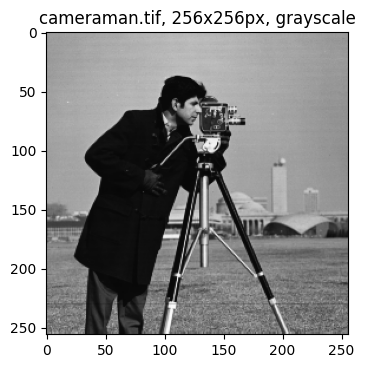

In [9]:
#@title  This is cameraman.tif, 256x256px grayscale { display-mode: "form" }
plt.figure(dpi = 100)
plt.title('cameraman.tif, 256x256px, grayscale')
plt.imshow(img_bgr);

In [10]:
#@title  Below you can choose JPEG level compression, and you can see PSNR (dB) for every step. { display-mode: "form" }
def f10(level):
    a = 'imagecompression/psnr_'+str(level)+'.jpg'
    cv.imwrite(a , img_bgr , [cv.IMWRITE_JPEG_QUALITY,level])
    aa = cv.imread(a)
    print("\nPSNR for value ", level, ": ",round(PSNR(img_bgr,aa),2),"dB. \n")
    print("Quality setting", level, ": ",round(os.path.getsize('imagecompression/psnr_'+str(level)+'.jpg')/1024,2),"kB. \n")
    
interact(f10, level=widgets.IntSlider(min=0, max=100, step=10, value=50));

interactive(children=(IntSlider(value=50, description='level', step=10), Output()), _dom_classes=('widget-inte…

#### **If report is required, please draw and examine a plot of at least 11 points, showing quality expressed in PSNR vs several bits per colour pixel of the compressed image.**

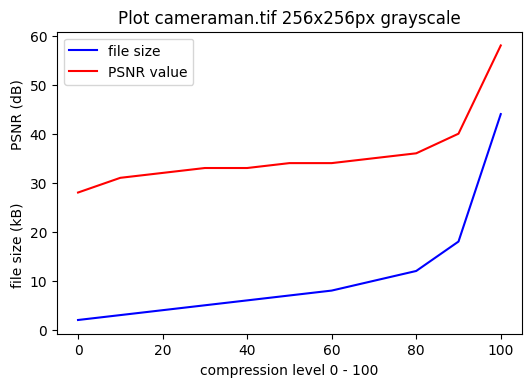

In [11]:
#@title  Click to show the plot { display-mode: "form" }
plt.figure(dpi = 100)
plt.title('Plot cameraman.tif 256x256px grayscale')
plt.xlabel('compression level 0 - 100')
plt.ylabel('file size (kB)            PSNR (dB)')
plt.plot([ 0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100 ],[ 2, 3, 4, 5, 6, 7, 8, 10, 12, 18, 44], color='b', label='file size')
plt.plot([0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100 ] , [28, 31, 32, 33, 33, 34, 34, 35, 36, 40, 58], color='r', label='PSNR value')
plt.legend(loc="upper left")
plt.show()

# <b>Exercise 5

---

#### <i>In numerical analysis and functional analysis, a discrete wavelet transform (DWT) is any wavelet transform for which the wavelets are discretely sampled. As with other wavelet transforms, a key advantage over Fourier transforms temporal resolution: it captures both frequency and location information (location in time). You can find more information at: 
#### https://en.wikipedia.org/wiki/Discrete_wavelet_transform


---



##### Wavelets discretely sample
##### Advantage over DCT – resolution
##### Capturing both frequency and location information
##### Artefacts less visible
##### Almost no blockiness


---



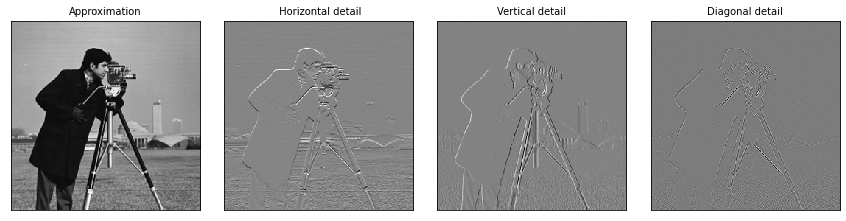

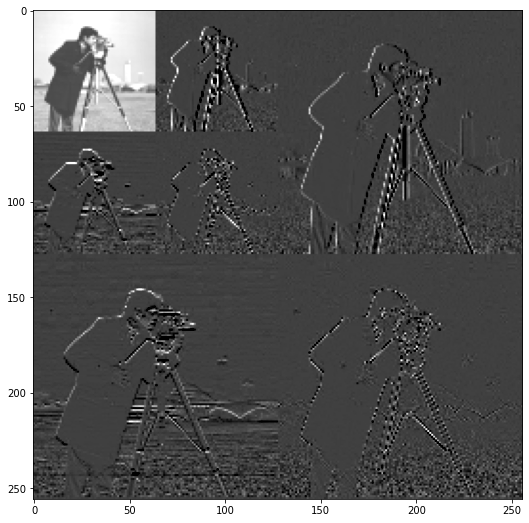

In [12]:
#@title  DWT { display-mode: "form" }
# Load image
original = pywt.data.camera()
# Wavelet transform of image, and plot approximation and details
titles = ['Approximation', ' Horizontal detail',
          'Vertical detail', 'Diagonal detail']
coeffs2 = pywt.dwt2(original, 'bior1.3')
LL, (LH, HL, HH) = coeffs2
fig = plt.figure(figsize=(12, 3))
for i, a in enumerate([LL, LH, HL, HH]):
    ax = fig.add_subplot(1, 4, i + 1)
    ax.imshow(a, interpolation="nearest", cmap=plt.cm.gray)
    ax.set_title(titles[i], fontsize=10)
    ax.set_xticks([])
    ax.set_yticks([])

fig.tight_layout()

# plt.show()
# plt.rcParams['figure.figsize'] = [16, 16]
# plt.rcParams.update({'font.size': 18})

plt.show()

A = imread(os.path.join('imagecompression/cameraman.jpg'))
B = np.mean(A, -1); # Convert RGB to grayscale
## Wavelet decomposition (2 level)
n = 2
w = 'db1'
coeffs = pywt.wavedec2(B,wavelet=w,level=n)

# normalize each coefficient array
coeffs[0] /= np.abs(coeffs[0]).max()
for detail_level in range(n):
    coeffs[detail_level + 1] = [d/np.abs(d).max() for d in coeffs[detail_level + 1]]

arr, coeff_slices = pywt.coeffs_to_array(coeffs)


plt.figure(figsize=[9.0, 9.0])
plt.imshow(arr,cmap='gray',vmin=-0.25,vmax=0.75)
plt.show()

In [13]:
#@title  Select from the list DWT image quality from 1 (highest quality) to 0.0001 (lowest quality) and observe quality changes in the picture below { display-mode: "form" }
def list(quality):
    A = imread(os.path.join('imagecompression/agh1.png'))
    B = np.mean(A, -1); # Convert RGB to grayscale
    C = imread(os.path.join('imagecompression/ownfile2.jpg'))
    D = np.mean(C, -1)

    ## Wavelet Compression
    n = 5
    w = 'db1'
    coeffs = pywt.wavedec2(B,wavelet=w,level=n)

    coeff_arr, coeff_slices = pywt.coeffs_to_array(coeffs)

    Csort = np.sort(np.abs(coeff_arr.reshape(-1)))

    #for keep in (0.1, 0.05, 0.01, 0.005):
    thresh = Csort[int(np.floor((1-quality)*len(Csort)))]
    ind = np.abs(coeff_arr) > thresh
    Cfilt = coeff_arr * ind # Threshold small indices
    
    coeffs_filt = pywt.array_to_coeffs(Cfilt,coeff_slices,output_format='wavedec2')
    
    # Plot reconstruction
    Arecon = pywt.waverec2(coeffs_filt,wavelet=w)
    original = Arecon
    titles = ['Approximation', ' Horizontal detail',
          'Vertical detail', 'Diagonal detail']
    coeffs2 = pywt.dwt2(original, 'bior1.3')
    LL, (LH, HL, HH) = coeffs2
    fig = plt.figure(figsize=(12, 3))
    for i, a in enumerate([LL, LH, HL, HH]):
      ax = fig.add_subplot(1, 4, i + 1)
      ax.imshow(a, interpolation="nearest", cmap=plt.cm.gray)
      ax.set_title(titles[i], fontsize=10)
      ax.set_xticks([])
      ax.set_yticks([])

    fig.tight_layout()

    plt.show()
    plt.rcParams['figure.figsize'] = [16, 16]
    plt.rcParams.update({'font.size': 18})
    title1 = 'Original image.jpg'
    title2 = ('quality = ' + str(quality))
    cmap = 'gray'
    ploting2(D, title1, Arecon, title2, cmap)
    
interact(list, quality = [1, 0.1, 0.01, 0.001, 0.0001]);

interactive(children=(Dropdown(description='quality', options=(1, 0.1, 0.01, 0.001, 0.0001), value=1), Output(…

##### Did you see any differences in DWT compression compared to the compression above types?

# <b>Exercise 6

---

In [14]:
#@title  Below you can check JPEG compression on your photo. { display-mode: "form" }
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode

def take_photo(filename='photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Click';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)
  data = eval_js('takePhoto({})'.format(quality))
  binary = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)
  return filename
  from IPython.display import Image
try:
  filename = take_photo()
  # Show the image which was just taken.
  #display(Image(filename))
except Exception as err:
  # Errors will be thrown if the user does not have a webcam or if they do not
  # grant the page permission to access it.
  print(str(err))
def f11(quality):
    b = 'owncomprese'+str(quality)+'.jpg'
    ownfile = cv.imread('photo.jpg')
    bc, gc, rc = cv.split(ownfile)
    ownfile_ok = cv.merge((rc,gc,bc))
    cv.imwrite(b , ownfile_ok , [cv.IMWRITE_JPEG_QUALITY,quality])
    bb = cv.imread(b)
    plt.figure(dpi = 50)
    plt.imshow(bb)
    plt.axis('off')
    plt.title(f" quality {quality} %")
    if quality == quality:
        print('Size of image  : ',round(os.path.getsize(b)/1024,2),'kB.')
#interact(f11, quality=widgets.IntSlider(min=0, max=100, step=5, value=0)); - other option than list with values
interact(f11, quality=[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40, 50, 60, 70, 80, 90, 100]);

<IPython.core.display.Javascript object>

interactive(children=(Dropdown(description='quality', options=(1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, …

# <b>Summary:
### If report is required reply:
<ul>
    <li><b>From Exercise 1 - What is the quality metric of the compressed image vs the uncompressed one? Was that possible to save a lot of file space using the lossless compression? </b></li>
    <li><b>From Exercise 2 - What is the quality deterioration of the compressed image vs. the uncompressed one?</b></li>
    <li><b>From Exercise 3 - What is the quality metric of the compressed image vs. the uncompressed one?</b></li>
    <li><b>From Exercise 4 - Please save a reference image as JPEG, at least 11 times using various quality levels Quality. Watch PSNR for every value. Draw and examine a plot of at least 11 points, showing quality expressed in PSNR vs. number of bits per colour pixel of compressed image.</b></li>
    <li><b>From Exercise 5 - Did you see any differences in DWT compression compared to the previous compression types?</b></li>    
</ul>

### <b>References

Source of images: 
###### cameraman - https://mathworks.com
###### AGH.tif - https://www.agh.edu.pl
###### poli.bmp - https://github.com/crisbal/dct-jpeg

# **Supplemental Exercise (Optional)**

---



# Below, you can see RAW images after lossless and lossy compression. When you select image or method compression from the list, wait about one minute to load compressed images.

## Select method of compression for every photo and prepare table with:

* filename

* file size before compression

* selected method of compression

* file size after compression

* conclusions

In [15]:
#@title Lossless compression { display-mode: "form" }
def homework(image, method):
  raw = rawpy.imread(image) # access to the RAW image
  rgb = raw.postprocess() # a numpy RGB array
  im = Image.fromarray(rgb)
  plt.figure(figsize=[6.0, 6.0])
  plt.imshow(im)
  plt.title('Image in {} format'.format(method.upper()))
  plt.axis('off')
  print('Image resolution: {}x{}'.format(rgb.shape[1], rgb.shape[0]))
  print('Size of selected image .CR2 :',round(os.path.getsize(image)/1024/1024,2),'MB')
  if method == 'gif':
    im.save('homework.gif', save_all=True, append_images=[])
    print('Size of selected image .gif :',round(os.path.getsize('homework.gif')/1024/1024,2),'MB')
  elif method == 'bmp':    
    im.save('homework.bmp')
    print('Size of selected image .bmp :',round(os.path.getsize('homework.bmp')/1024/1024,2),'MB')
  elif method == 'png':
    im.save('homework.png')
    print('Size of selected image .png :',round(os.path.getsize('homework.png')/1024/1024,2),'MB')
  elif method == 'tif':
    im.save('homework.tif')
    print('Size of selected image .tif :',round(os.path.getsize('homework.tif')/1024/1024,2),'MB')
  elif method == 'tga':
    im.save('homework.tga')
    print('Size of selected image .tga :',round(os.path.getsize('homework.tga')/1024/1024,2),'MB')
  elif method == 'pcx':
    im.save('homework.pcx')
    print('Size of selected image .pcx :',round(os.path.getsize('homework.pcx')/1024/1024,2),'MB')
  
interact(homework, image=[('Image 1','imagecompression/2.CR2'),('Image 2','imagecompression/1.CR2'),('Image 3','imagecompression/3.CR2'),('Image 4','imagecompression/4.CR2'),('Image 5','imagecompression/5.CR2'),('Image 6','imagecompression/6.CR2'),('Image 7','imagecompression/7.CR2'),('Image 8','imagecompression/8.CR2')], method = ['gif', 'bmp', 'png', 'tif', 'tga', 'pcx']);

interactive(children=(Dropdown(description='image', options=(('Image 1', 'imagecompression/2.CR2'), ('Image 2'…

In [ ]:
#@title  Lossy compression (JPEG) { display-mode: "form" }
def homework(image):
  print('Size of selected image .CR2 :',round(os.path.getsize(image)/1024/1024,2),'MB')
  raw = rawpy.imread(image) # access to the RAW image
  rgb = raw.postprocess() # a numpy RGB array
  cv.imwrite('homework.jpg' , rgb, [cv.IMWRITE_JPEG_QUALITY,100])
  plt.figure(figsize=[15.0, 22.0])
  j=1
  y = []
  x = []
  for i in range(0,101,5):
    cv.imwrite('homework{}.jpg'.format(i) , rgb, [cv.IMWRITE_JPEG_QUALITY,i])
    size = round(os.path.getsize('homework{}.jpg'.format(i))/1024/1024,2)
    img = cv.imread('homework{}.jpg'.format(i))
    x.append(i)
    y.append(size)
    if i in {0,10,20,30,40,60,80,100}:
      plt.subplot(4,2,j)
      plt.title('Compression quality {}\nImage size (in MB): {}'.format(i,size))
      plt.imshow(img)
      plt.axis('off')
      j+=1
  plt.figure(figsize=[6.0, 6.0])
  plt.title('Plot selected image after compression')
  plt.xlabel('compression level 0 - 100')
  plt.ylabel('file size (MB)')
  plt.plot(x,y, color='b', label='file size')
  plt.legend(loc="upper left")

  plt.show()
interact(homework, image=[('Image 1','imagecompression/2.CR2'),('Image 2','imagecompression/1.CR2'),('Image 3','imagecompression/3.CR2'),('Image 4','imagecompression/4.CR2'),('Image 5','imagecompression/5.CR2'),('Image 6','imagecompression/6.CR2'),('Image 7','imagecompression/7.CR2'),('Image 8','imagecompression/8.CR2')]);

### *Did you see any differences in lossless compression compared to the lossy compression?*

### *Imagine you are a hired photographer at a party. The ordering person expects the photos to be printed (developed) later to keep the event souvenir. Which compression method will you use to take these photos?*

### *And what compression method will you use to take pictures for use on a website?*

photos author: @Szymon Bondyra